In [10]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
basedir = "/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/"

# Get the field moments + odb muon info 
## Load the pickle file for the 60 hour dataset

In [11]:
path = basedir + 'synthesis/data/60H_field_ctag_dqm.pkl'
df = pd.read_pickle(path)
df.head()

DateTime        D        eD        NQ       eNQ  \
run   subrun                                                              
15921 0      2018-04-22 13:14:02  841.735  0.079075  0.032789  0.096987   
      0      2018-04-22 13:14:04  841.706  0.079075  0.060667  0.096987   
      0      2018-04-22 13:14:06  841.685  0.079075  0.054613  0.096987   
      0      2018-04-22 13:14:08  841.714  0.079075  0.044995  0.096987   
      0      2018-04-22 13:14:10  841.708  0.079075  0.055440  0.096987   

                    SQ       eSQ       NS       eNS          start_time  ...  \
run   subrun                                                             ...   
15921 0       0.169870  0.030298 -1.15897  0.035181 2018-04-22 13:14:00  ...   
      0       0.175534  0.030298 -1.16613  0.035181 2018-04-22 13:14:00  ...   
      0       0.173558  0.030298 -1.17401  0.035181 2018-04-22 13:14:00  ...   
      0       0.173786  0.030298 -1.16228  0.035181 2018-04-22 13:14:00  ...   
      0       0.173864  0.030298 -1.16585  0.035181 2018-04-22 13:14:00  ...   

             field_ok  trolley_period field_period ctags_loose_ok  \
run   subrun                                                        
15921 0          True             0.0          1.0          False   
      0          True             0.0          1.0          False   
      0          True             0.0          1.0          False   
      0          True             0.0          1.0          False   
      0          True             0.0          1.0          False   

              quad_loose_ok  ctags_repeat_ok  losses_repeat_ok  \
run   subrun                                                     
15921 0                None             None              None   
      0                None             None              None   
      0                None             None              None   
      0                None             None              None   
      0                None             None              None   

              fillcuts_repeat_ok           poor_time  poor_ctags  
run   subrun                                                      
15921 0                     None 2018-04-22 13:14:26       231.5  
      0                     None 2018-04-22 13:14:26       231.5  
      0                     None 2018-04-22 13:14:26       231.5  
      0                     None 2018-04-22 13:14:26       231.5  
      0                     None 2018-04-22 13:14:26       231.5  

[5 rows x 28 columns]

DateTime        D        eD        NQ       eNQ  \
run   subrun                                                              
15921 0      2018-04-22 13:14:02  841.735  0.079075  0.032789  0.096987   
      0      2018-04-22 13:14:04  841.706  0.079075  0.060667  0.096987   
      0      2018-04-22 13:14:06  841.685  0.079075  0.054613  0.096987   
      0      2018-04-22 13:14:08  841.714  0.079075  0.044995  0.096987   
      0      2018-04-22 13:14:10  841.708  0.079075  0.055440  0.096987   

                    SQ       eSQ       NS       eNS          start_time  ...  \
run   subrun                                                             ...   
15921 0       0.169870  0.030298 -1.15897  0.035181 2018-04-22 13:14:00  ...   
      0       0.175534  0.030298 -1.16613  0.035181 2018-04-22 13:14:00  ...   
      0       0.173558  0.030298 -1.17401  0.035181 2018-04-22 13:14:00  ...   
      0       0.173786  0.030298 -1.16228  0.035181 2018-04-22 13:14:00  ...   
      0       0.173864  0.030298 -1.16585  0.035181 2018-04-22 13:14:00  ...   

             field_ok  trolley_period field_period ctags_loose_ok  \
run   subrun                                                        
15921 0          True             0.0          1.0          False   
      0          True             0.0          1.0          False   
      0          True             0.0          1.0          False   
      0          True             0.0          1.0          False   
      0          True             0.0          1.0          False   

              quad_loose_ok  ctags_repeat_ok  losses_repeat_ok  \
run   subrun                                                     
15921 0                None             None              None   
      0                None             None              None   
      0                None             None              None   
      0                None             None              None   
      0                None             None              None   

              fillcuts_repeat_ok           poor_time  poor_ctags  
run   subrun                                                      
15921 0                     None 2018-04-22 13:14:26       231.5  
      0                     None 2018-04-22 13:14:26       231.5  
      0                     None 2018-04-22 13:14:26       231.5  
      0                     None 2018-04-22 13:14:26       231.5  
      0                     None 2018-04-22 13:14:26       231.5  

[5 rows x 28 columns]

## get the ctag weighted field moments

In [12]:
path= basedir + 'field_info/'
sys.path.append(path)
from field_grid import *

In [13]:
total_ctags = df["ctags"].sum()
b = [
    (df["D"]*df["ctags"]).sum()/total_ctags,
    (df["NQ"]*df["ctags"]).sum()/total_ctags,
    (df["SQ"]*df["ctags"]).sum()/total_ctags,
    (df["NS"]*df["ctags"]).sum()/total_ctags
    ]

## get and plot the field grid based on the ctag weighted field moments

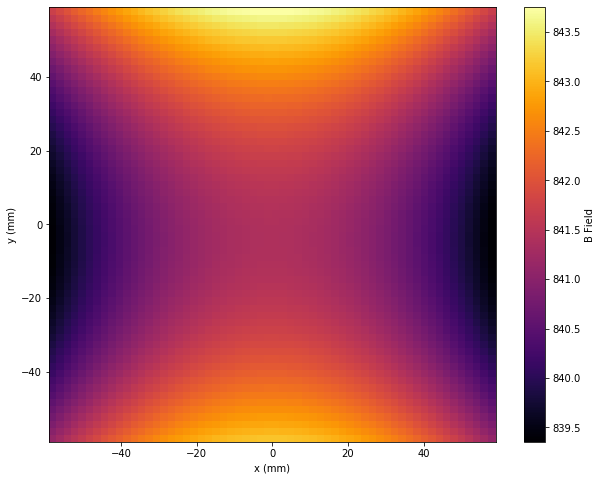

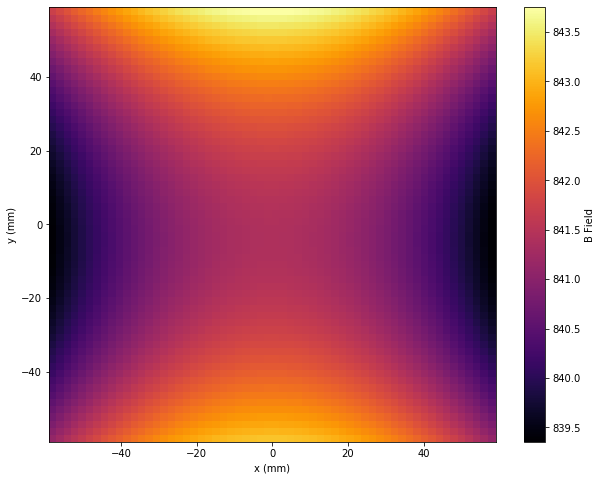

In [14]:
df_field_grid = get_field_grid(b)
fig = plot_field(df_field_grid)
fig

# Get the tracker info

In [15]:
import sys
path= basedir + 'tracker_info'
sys.path.append(path)
from beam_moments import *
from transform_beam import *

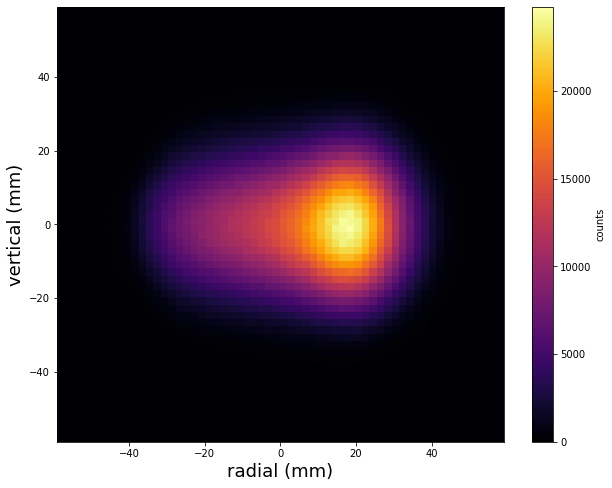

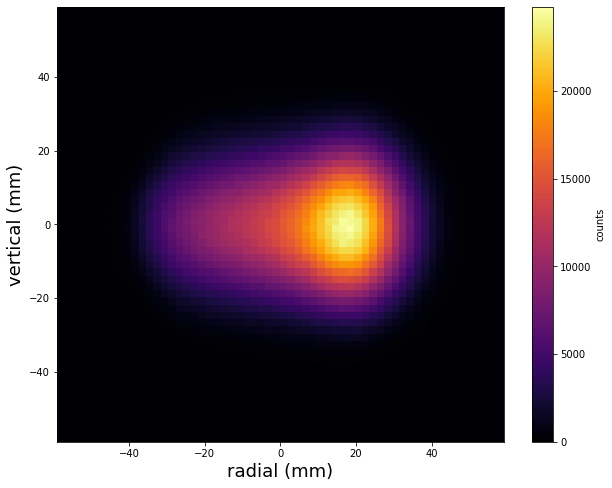

In [16]:
df_tracker = get_df_tracker()
#only look at station 12 or 18
mask12 = (df_tracker["Station"] == 'station12')
mask18 = (df_tracker["Station"] == 'station18')

df_12 = df_tracker[mask12].copy()
df_12['counts_norm'] = df_12['counts']/df_12['counts'].sum()
fig = plot_beam(df_12,bins=60)
fig

# mess up the ctags and see the result

In [23]:
size = df.shape[0]
noise_max = 10

noise =  np.random.randint(-noise_max,noise_max, size)
noise = noise/100.0
df['noisy_ctags'] = df['ctags'] + df['ctags']*noise

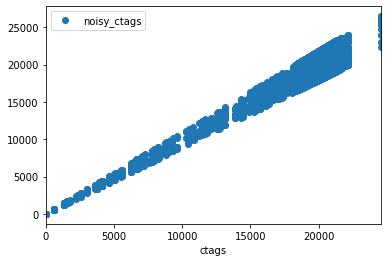

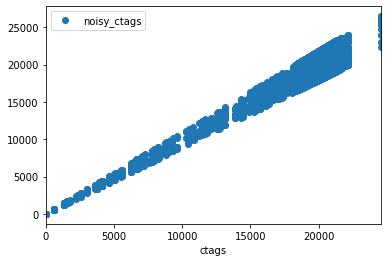

In [25]:
df.plot('ctags','noisy_ctags',style='o')

### Now add progressivly more noise in a loop

In [ ]:
fig = plt.figure(figsize=(11,7))
size = df.shape[0]
spacing = 5.
low = 0
high = 100
maxes = np.arange(low,high,spacing)

B_arr = np.empty(0)
for noise_max in maxes:
    noise =  np.random.randint(-noise_max,noise_max, size)
    noise = noise/100.0
    total_ctags = df["noisy_ctags"].sum()
    b = [
        (df["D"]*df["noisy_ctags"]).sum()/total_ctags,
        (df["NQ"]*df["noisy_ctags"]).sum()/total_ctags,
        (df["SQ"]*df["noisy_ctags"]).sum()/total_ctags,
        (df["NS"]*df["noisy_ctags"]).sum()/total_ctags
    ]
    
    B = (df['counts']*df_field_grid['B']).sum()/(df['counts'].sum())
    B_arr = np.append(B_arr,B)

In [18]:
spacing = 5.
low = 0
high=100





#####Station 12########
B_arr = np.empty(0)
rand_range = np.arange(low,high,spacing)
for  in rand_range:
    df = shift_beam(df_12,xshift,yshift)
    B = (df['counts']*df_field_grid['B']).sum()/(df['counts'].sum())
    B_arr = np.append(B_arr,B)
plt.scatter(x_range, B_arr, alpha=0.9, marker=9,
            label="Station 12: x translation",s=200)

SyntaxError: invalid syntax (<ipython-input-18-737c91737819>, line 10)

SyntaxError: invalid syntax (<ipython-input-18-737c91737819>, line 10)